# FUNCTION gradimg

The gradimg function computes the image gradient.

<ul> <strong> g = gradimg(f) </strong>
       <ul> <li> <strong> Output </strong> </li>
           <ul> <li><strong>g: </strong> ndarray, gradient image (2D or 3D)</li>
           </ul>
       </ul>
       <ul> <li> <strong> Input </strong> </li>
           <ul> <li><strong>f: </strong> ndarray, input image (2D or 3D)</li>
           </ul>
       </ul>
</ul>


# FUNCTION CODE

In [16]:
import nbimporter
import numpy as np
from scipy.stats import *
from auxiliary_functions import *


def gradimg(f):

    if len(f.shape) == 2:                              # 2D case
        h1 = np.array([[0,1,0],                           # Defining the horizontal mask
                    [0,0,0],
                    [0,-1,0]])
        h2 = np.array([[0,0,0],                           # Defining the vertical mask
                    [1,0,-1],
                    [0,0,0]])
    
        aux1 = iaconv(f,h1)[1:-1,1:-1].astype(int)     # Make the convolution between horizontal mask and image
        aux2 = iaconv(f,h2)[1:-1,1:-1].astype(int)     # Make the convolution between vertical mask and image
        g = np.sqrt(aux1**2 + aux2**2)                    # Use the equation to compute the gradient of an image
            
        return g
            
    else:                                              # 3D case
        h1 = np.array([[[0,0,0],                          # Defining the horizontal mask 
                     [0,0,0],
                     [0,0,0]],
                    [[0,1,0],
                     [0,0,0],
                     [0,-1,0]],
                    [[0,0,0],
                     [0,0,0],
                     [0,0,0]]])
        h2 = np.array([[[0,0,0],                          # Defining the vertical mask
                     [0,0,0],
                     [0,0,0]],
                    [[0,0,0],
                     [1,0,-1],
                     [0,0,0]],
                    [[0,0,0],
                     [0,0,0],
                     [0,0,0]]])
        h3 = np.array([[[0,0,0],                          # Defining the depth mask
                     [0,1,0],
                     [0,0,0]],
                    [[0,0,0],
                     [0,0,0],
                     [0,0,0]],
                    [[0,0,0],
                     [0,-1,0],
                     [0,0,0]]])  
    
        aux1 = iaconv(f,h1)[1:-1,1:-1,1:-1].astype(int)# Make the convolution between horizontal mask and image 
        aux2 = iaconv(f,h2)[1:-1,1:-1,1:-1].astype(int)# Make the convolution between vertical mask and image
        aux3 = iaconv(f,h3)[1:-1,1:-1,1:-1].astype(int)# Make the convolution between depth mask and image
        grad = np.sqrt(aux1**2 + aux2**2 + aux3**2)       # Use the equation to compute the gradient of an image
        return grad


# EXAMPLES

Numerical Examples

In [20]:
import nbimporter 
from gradstat import *

f = np.array( [[2,2,0,1,1,1,0,0,0],
               [1,2,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1],
               [0,0,2,2,2,1,1,0,0]], dtype=np.uint8)
np.set_printoptions(precision=2)
g = gradimg(f)
print 'First step: gradient using masks above:\n',g
grad,stats = gradstat(f)
print
print 'Second step: gradient - pixels from external contour:\n', grad

First step: gradient using masks above:
[[ 2.24  2.83  1.41  1.41  1.    1.41  1.41  1.    1.  ]
 [ 2.24  1.    1.41  0.    0.    0.    1.    1.    1.41]
 [ 1.41  2.    1.    1.    1.    0.    0.    1.    1.41]
 [ 1.    2.24  2.24  1.    1.41  1.41  1.41  1.41  1.  ]]

Second step: gradient - pixels from external contour:
[ 1.    1.41  0.    0.    0.    1.    1.    2.    1.    1.    1.    0.    0.
  1.  ]


In [22]:
f = np.array( [[0,0,0,1,1,1,0,0,0],
               [1,1,1,1,1,1,1,1,1],
               [1,1,1,1,1,1,1,1,1],
               [0,0,0,1,1,1,1,0,0]], dtype=np.uint8)

g = gradimg(f)
print 'gradient[f]=',g
print
print 'g: ', g[f>0]
print

gradient[f]= [[ 1.    1.    1.41  1.41  1.    1.41  1.41  1.    1.  ]
 [ 1.41  1.    1.    0.    0.    0.    1.    1.    1.41]
 [ 1.41  1.    1.    0.    0.    0.    0.    1.    1.41]
 [ 1.    1.    1.41  1.41  1.    1.    1.41  1.41  1.  ]]

g:  [ 1.41  1.    1.41  1.41  1.    1.    0.    0.    0.    1.    1.    1.41
  1.41  1.    1.    0.    0.    0.    0.    1.    1.41  1.41  1.    1.
  1.41]



In [26]:
import nbimporter
from histogram import *
from histstat import *


f = np.array( [[0,0,0,1,1],
               [1,1,1,1,1],
               [1,1,1,1,1],
               [0,0,0,1,1],
               [1,1,1,1,1]], dtype=np.uint8)

g = gradimg(f)
h = hist(f)
print 'gradient[f]=',g

gradient[f]= [[ 1.    1.    1.41  1.41  1.41]
 [ 1.41  1.    1.    0.    1.  ]
 [ 1.41  1.    1.    0.    1.  ]
 [ 0.    0.    1.    1.    1.  ]
 [ 1.    0.    0.    1.    1.41]]



Original Image


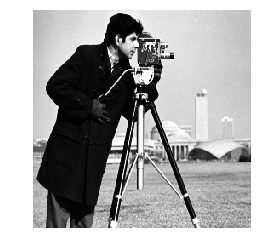

Gradient Image


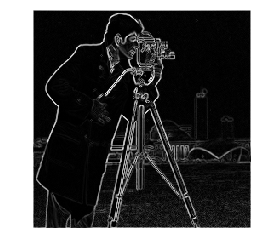

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

f = plt.imread('cameraman.png', 'gray')

plt.imshow(ianormalize(f), 'gray')
g = gradimg(f)
print
print 'Original Image'
plt.axis('off')
plt.imshow(f, cmap='gray')
plt.show()
print 'Gradient Image'
plt.axis('off')
plt.imshow(ianormalize(g), cmap='gray')
plt.show()

** 3D Example **

In [29]:
f = np.array( [[[0,0,0,1,1],
             [1,1,1,1,1],
             [1,1,1,1,1],
             [0,0,0,1,1]],
             [[0,0,0,1,1],
             [1,1,1,1,1],
              [1,1,1,1,1],
              [0,0,0,1,1]]], dtype=np.uint8)

g = gradimg(f)
print 'gradient[f]=',g

gradient[f]= [[[ 1.    1.    1.41  1.73  1.73]
  [ 1.73  1.41  1.41  1.    1.41]
  [ 1.73  1.41  1.41  1.    1.41]
  [ 1.    1.    1.41  1.73  1.73]]

 [[ 1.    1.    1.41  1.73  1.73]
  [ 1.73  1.41  1.41  1.    1.41]
  [ 1.73  1.41  1.41  1.    1.41]
  [ 1.    1.    1.41  1.73  1.73]]]
